 **Pavan Pyla**
 # Fraud Provider Detection In Health Care using several Classification Tecniques

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

### Reading the data into Data Frame

In [2]:
Train=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")

In [3]:
Train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [4]:
Train_Beneficiarydata

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [5]:
Train_Inpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Train_Outpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Merging OutPatient ,Inpatient and Beneficiary

In [7]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [8]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

## Data Preprocessing

In [9]:
Train_Allpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE158968,CLM36721,2009-02-02,2009-02-07,PRV56335,8000,PHY346834,PHY376714,NaN,4552,...,1,2,2,2,2,2,9500,1568,0,0
558207,BENE158970,CLM44251,2009-03-26,2009-03-31,PRV52019,7000,PHY337065,NaN,NaN,25080,...,2,1,1,1,2,1,7000,1068,1290,740
558208,BENE159064,CLM72015,2009-10-14,2009-10-23,PRV52135,22000,PHY315112,NaN,NaN,V5789,...,2,1,2,2,2,2,22000,1068,0,0
558209,BENE159103,CLM58155,2009-07-02,2009-07-04,PRV53923,4000,PHY420889,PHY428043,NaN,4580,...,1,2,1,1,2,2,4000,1068,0,0


In [10]:
df=pd.merge(Train_Allpatientdata,Train,on='Provider')

In [11]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE57978,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,...,1,1,2,1,2,2200,2136,30,100,No
558207,BENE80245,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,...,1,2,2,2,2,4000,1068,0,0,No
558208,BENE85177,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,...,2,1,2,2,2,8000,1068,0,0,No
558209,BENE105577,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,...,1,1,2,2,2,5000,1068,0,0,No


In [12]:
df1=df

In [13]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE57978,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,...,1,1,2,1,2,2200,2136,30,100,No
558207,BENE80245,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,...,1,2,2,2,2,4000,1068,0,0,No
558208,BENE85177,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,...,2,1,2,2,2,8000,1068,0,0,No
558209,BENE105577,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,...,1,1,2,2,2,5000,1068,0,0,No


In [14]:
df=df.drop(['BeneID','ClaimID'],axis=1)

In [15]:
df

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,...,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,...,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,5859,...,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,25000,...,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,4240,...,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,5715,...,1,1,2,2,2,5000,1068,0,0,No


In [16]:
df.isna().sum()  

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                 558202
ClmProcedureCode_6                 558211
DeductibleAmtPaid                 

In [17]:
df=df.drop(['ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10',
                'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
                'ClmProcedureCode_5','ClmProcedureCode_6',],axis=1)

In [18]:
df

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,DeductibleAmtPaid,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,0.0,...,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,1068.0,...,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,1068.0,...,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,1068.0,...,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,1068.0,...,1,1,2,2,2,5000,1068,0,0,No


In [19]:
df.isna().sum()  

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

### Checking whether a provider always doing Fraud or not

In [20]:
check = df[df['Provider'] == 'PRV56011']
print(check.shape[0])
check =check[check['PotentialFraud']=='Yes']
print(check.shape[0])

2833
2833


In [21]:
check = df[df['Provider'] == 'PRV53511']
print(check.shape[0])
check =check[check['PotentialFraud']=='Yes']
print(check.shape[0])

1
0


In [22]:
data=df

In [23]:
df = pd.DataFrame()
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

#### Calculating the no of Days of stay 

In [24]:

startdate= pd.to_datetime( data["AdmissionDt"] )
enddate= pd.to_datetime( data["DischargeDt"] )

pe = ( enddate - startdate).dt.days                    
df["Hperiod"] = pe

In [25]:
df['claim']=data['InscClaimAmtReimbursed']

In [26]:
startdate= pd.to_datetime( data["ClaimStartDt"] )
enddate= pd.to_datetime( data["ClaimEndDt"] )

p = ( enddate - startdate).dt.days
df["period"] = p

### checking for same physician in all three physician columns

In [27]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_same=data.apply(physician_same,axis=1)

In [28]:
df['phy_same']=phy_same

In [29]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()

In [30]:

  

data['PotentialFraud']= label_encoder.fit_transform(data['PotentialFraud'])
  
data['PotentialFraud'].unique()

array([1, 0])

In [31]:
data['PotentialFraud'].sum()       ## The target variable is balanced in both categories

212796

In [32]:
data['Gender']

0         2
1         1
2         1
3         1
4         1
         ..
558206    2
558207    1
558208    1
558209    2
558210    2
Name: Gender, Length: 558211, dtype: int64

In [33]:
df

,Hperiod,claim,period,phy_same
0,NaN,30,0,3
1,NaN,40,0,3
2,NaN,200,0,3
3,NaN,20,0,3
4,NaN,40,0,3
...,...,...,...,...
558206,5.0,0,5,3
558207,3.0,4000,3,3
558208,8.0,8000,8,3
558209,3.0,5000,3,3


In [34]:
from sklearn.preprocessing import OneHotEncoder     # One Hot Encoding 
                                                        

####  One hot encoding for the gender ( categorical data )

In [35]:
encoder = OneHotEncoder()


one_hot = encoder.fit_transform(data[['Gender']]).toarray()


df = pd.concat([df, pd.DataFrame(one_hot, columns=encoder.get_feature_names())], axis=1)


print(df)

        Hperiod  claim  period  phy_same  x0_1  x0_2
0           NaN     30       0         3   0.0   1.0
1           NaN     40       0         3   1.0   0.0
2           NaN    200       0         3   1.0   0.0
3           NaN     20       0         3   1.0   0.0
4           NaN     40       0         3   1.0   0.0
...         ...    ...     ...       ...   ...   ...
558206      5.0      0       5         3   0.0   1.0
558207      3.0   4000       3         3   1.0   0.0
558208      8.0   8000       8         3   1.0   0.0
558209      3.0   5000       3         3   0.0   1.0
558210      8.0   3000       8         3   0.0   1.0

[558211 rows x 6 columns]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Applying the Feature Scalling tecnique for columns with larger integers

In [36]:
from sklearn.preprocessing import StandardScaler


In [37]:

scaler = StandardScaler()

# specify the columns to scale
columns_to_scale = ['claim']

# fit the scaler to the selected columns and transform them
scaled_data = scaler.fit_transform(df[columns_to_scale])

# create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# merge the scaled columns with the remaining columns in the original DataFrame
df= pd.concat([df_scaled, df.drop(columns_to_scale, axis=1)], axis=1)

# display the scaled DataFrame
print(df)




           claim  Hperiod  period  phy_same  x0_1  x0_2
0      -0.253043      NaN       0         3   0.0   1.0
1      -0.250426      NaN       0         3   1.0   0.0
2      -0.208558      NaN       0         3   1.0   0.0
3      -0.255660      NaN       0         3   1.0   0.0
4      -0.250426      NaN       0         3   1.0   0.0
...          ...      ...     ...       ...   ...   ...
558206 -0.260893      5.0       5         3   0.0   1.0
558207  0.785807      3.0       3         3   1.0   0.0
558208  1.832508      8.0       8         3   1.0   0.0
558209  1.047483      3.0       3         3   0.0   1.0
558210  0.524132      8.0       8         3   0.0   1.0

[558211 rows x 6 columns]


In [38]:
# df["Gender"]=data["Gender"].replace({2:0})

In [39]:
df

,claim,Hperiod,period,phy_same,x0_1,x0_2
0,-0.253043,NaN,0,3,0.0,1.0
1,-0.250426,NaN,0,3,1.0,0.0
2,-0.208558,NaN,0,3,1.0,0.0
3,-0.255660,NaN,0,3,1.0,0.0
4,-0.250426,NaN,0,3,1.0,0.0
...,...,...,...,...,...,...
558206,-0.260893,5.0,5,3,0.0,1.0
558207,0.785807,3.0,3,3,1.0,0.0
558208,1.832508,8.0,8,3,1.0,0.0
558209,1.047483,3.0,3,3,0.0,1.0


In [40]:
df["RenalDiseaseIndicator"]=data["RenalDiseaseIndicator"].replace({"Y":1})

In [41]:
birthdate=pd.to_datetime(data["DOB"])
enddate=pd.to_datetime(data["DOD"])

# cheack whether the patient dead or alive
def alife_function(value):
    if value==True:
        return 1
    else:
        return 0
alive = pd.isna(enddate).apply(alife_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

df["age"]=period
df["alife"]=alive

In [42]:
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [43]:
from pandas.api.types import is_numeric_dtype

In [44]:
for i in df.columns:
  print(f"{i }:",is_numeric_dtype(df
[i]))

claim: True
Hperiod: True
period: True
phy_same: True
x0_1: True
x0_2: True
RenalDiseaseIndicator: False
age: True
alife: True


In [45]:
columns=['NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_Alzheimer','ChronicCond_KidneyDisease','ChronicCond_Cancer',
         'ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
         'ChronicCond_stroke','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid','IPAnnualReimbursementAmt','PotentialFraud']

#### Label encoding for Provider variable

In [46]:
df['Provider']= label_encoder.fit_transform(data['Provider'])
  
df['Provider'].unique()

array([4004, 5280, 5269, ..., 2810,  185, 2016])

In [47]:
for i in columns:
    df[i]=data[i]

In [48]:
df['Provider']=df['Provider']

In [49]:
df.columns

Index(['claim', 'Hperiod', 'period', 'phy_same', 'x0_1', 'x0_2',
       'RenalDiseaseIndicator', 'age', 'alife', 'Provider',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_stroke', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'DeductibleAmtPaid',
       'IPAnnualReimbursementAmt', 'PotentialFraud'],
      dtype='object')

In [50]:
pd.set_option('display.max_columns', None)
print(df)

           claim  Hperiod  period  phy_same  x0_1  x0_2 RenalDiseaseIndicator  \
0      -0.253043      NaN       0         3   0.0   1.0                     0   
1      -0.250426      NaN       0         3   1.0   0.0                     0   
2      -0.208558      NaN       0         3   1.0   0.0                     0   
3      -0.255660      NaN       0         3   1.0   0.0                     0   
4      -0.250426      NaN       0         3   1.0   0.0                     0   
...          ...      ...     ...       ...   ...   ...                   ...   
558206 -0.260893      5.0       5         3   0.0   1.0                     0   
558207  0.785807      3.0       3         3   1.0   0.0                     1   
558208  1.832508      8.0       8         3   1.0   0.0                     0   
558209  1.047483      3.0       3         3   0.0   1.0                     0   
558210  0.524132      8.0       8         3   0.0   1.0                     0   

        age  alife  Provide

In [51]:
df

,claim,Hperiod,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,IPAnnualReimbursementAmt,PotentialFraud
0,-0.253043,NaN,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,30,50,0.0,0,1
1,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,0,1
2,-0.208558,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,0,1
3,-0.255660,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,0,1
4,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.260893,5.0,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,30,100,1068.0,2200,0
558207,0.785807,3.0,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2,0,0,1068.0,4000,0
558208,1.832508,8.0,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,0,0,1068.0,8000,0
558209,1.047483,3.0,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,0,0,1068.0,5000,0


### Feautre scalling

In [52]:
scaler = StandardScaler()

# specify the columns to scale
columns_to_scale = ['OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid']

# fit the scaler to the selected columns and transform them
scaled_data = scaler.fit_transform(df[columns_to_scale])

# create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# merge the scaled columns with the remaining columns in the original DataFrame
df= pd.concat([df_scaled, df.drop(columns_to_scale, axis=1)], axis=1)

# display the scaled DataFrame
print(df)

        OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  DeductibleAmtPaid  \
0                      -0.579164              -0.598490          -0.286191   
1                      -0.120619               0.110079          -0.286191   
2                      -0.120619               0.110079          -0.286191   
3                      -0.120619               0.110079          -0.286191   
4                      -0.120619               0.110079          -0.286191   
...                          ...                    ...                ...   
558206                 -0.579164              -0.548591           3.611384   
558207                 -0.586893              -0.648389           3.611384   
558208                 -0.586893              -0.648389           3.611384   
558209                 -0.586893              -0.648389           3.611384   
558210                 -0.586893              -0.648389           3.611384   

           claim  Hperiod  period  phy_same  x0_1  x0_2 RenalDi

In [53]:
df

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,Hperiod,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,IPAnnualReimbursementAmt,PotentialFraud
0,-0.579164,-0.598490,-0.286191,-0.253043,NaN,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,0,1
1,-0.120619,0.110079,-0.286191,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0,1
2,-0.120619,0.110079,-0.286191,-0.208558,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0,1
3,-0.120619,0.110079,-0.286191,-0.255660,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0,1
4,-0.120619,0.110079,-0.286191,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5.0,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,2200,0
558207,-0.586893,-0.648389,3.611384,0.785807,3.0,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2,4000,0
558208,-0.586893,-0.648389,3.611384,1.832508,8.0,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,8000,0
558209,-0.586893,-0.648389,3.611384,1.047483,3.0,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,5000,0


In [54]:
df=df.drop(['Hperiod'],axis=1)

### Removing the Duplicates

In [55]:
df = df.drop_duplicates()

In [56]:
df.shape[0]

542151

In [57]:
pro =df

In [58]:
Y=df['PotentialFraud']

X=df.iloc[:,:-1]

In [59]:
X.isna().sum()

OPAnnualReimbursementAmt        0
OPAnnualDeductibleAmt           0
DeductibleAmtPaid             899
claim                           0
period                          0
phy_same                        0
x0_1                            0
x0_2                            0
RenalDiseaseIndicator           0
age                             0
alife                           0
Provider                        0
NoOfMonths_PartACov             0
NoOfMonths_PartBCov             0
ChronicCond_Alzheimer           0
ChronicCond_KidneyDisease       0
ChronicCond_Cancer              0
ChronicCond_ObstrPulmonary      0
ChronicCond_Depression          0
ChronicCond_Diabetes            0
ChronicCond_IschemicHeart       0
ChronicCond_stroke              0
IPAnnualReimbursementAmt        0
dtype: int64

In [60]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X,Y = oversample.fit_resample(X, Y)
#X=X.fillna(0)

#### Imputing 'DeductibleAmtPaid' Using Regression

<AxesSubplot:>

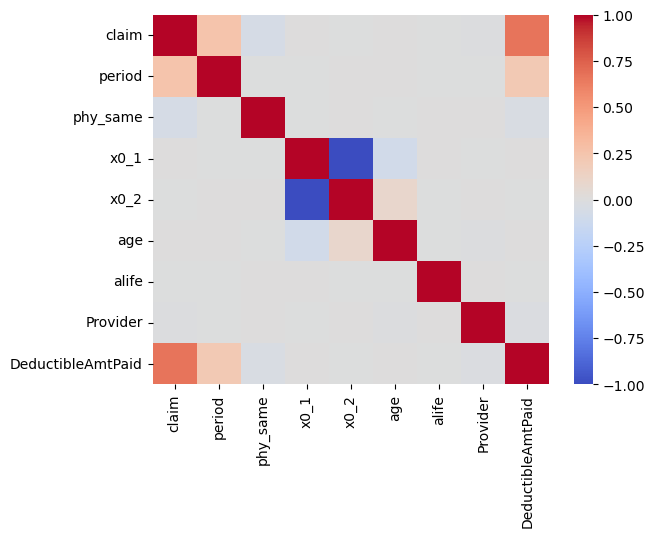

In [61]:
import pandas as pd
import seaborn as sns

cols_of_interest = ['claim',  'period', 'phy_same', 'x0_1', 'x0_2',
       'RenalDiseaseIndicator', 'age', 'alife', 'Provider',
       'DeductibleAmtPaid']

# Calculate correlation matrix
corr_matrix= df[cols_of_interest].corr()

# Create heatmap
sns.heatmap(corr_matrix,  cmap='coolwarm')

In [62]:

missing_data = X[X['DeductibleAmtPaid'].isnull()]
non_missing_data = X[X['DeductibleAmtPaid'].notnull()]



In [63]:
missing_data

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,IPAnnualReimbursementAmt
3102,-0.249424,-0.368953,NaN,2.617534,7,3,1.0,0.0,1,64,1,3961,12,12,1,1,1,1,1,1,1,2,34500
3371,-0.563708,-0.548591,NaN,1.047483,6,3,1.0,0.0,1,85,1,3919,12,12,2,1,1,2,2,1,1,2,20000
3390,0.162751,0.030240,NaN,2.355859,6,3,1.0,0.0,1,78,1,3919,12,12,1,1,2,2,1,1,1,2,21000
4279,-0.200478,0.519252,NaN,2.355859,5,3,0.0,1.0,0,80,1,832,12,12,1,1,1,1,1,1,1,2,102200
11149,-0.424599,-0.079538,NaN,2.094183,7,3,0.0,1.0,1,88,1,1054,12,12,1,1,2,1,1,1,1,2,14210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557763,-0.231391,-0.428833,NaN,0.524132,3,3,0.0,1.0,0,89,1,4080,12,12,1,2,1,1,1,1,1,2,15000
558024,6.121261,6.237702,NaN,1.570833,5,3,0.0,1.0,1,73,1,3731,12,12,1,1,2,2,2,1,1,2,15000
558139,-0.321555,-0.478732,NaN,3.402559,6,3,1.0,0.0,0,70,1,667,12,12,2,2,2,2,1,1,1,2,24000
558172,-0.259729,0.199897,NaN,1.309158,13,3,0.0,1.0,0,68,1,2946,12,12,2,1,2,2,1,1,1,1,8000


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [65]:
reg = LinearRegression().fit(non_missing_data[['period','claim']], non_missing_data['DeductibleAmtPaid'])
missing_data['DeductibleAmtPaid'] = reg.predict(missing_data[['period','claim']])

y_pred=reg.predict(non_missing_data[['period','claim']])
mse = mean_squared_error(non_missing_data['DeductibleAmtPaid'], y_pred)
print("Mean squared error:", mse)

# Print the coefficients of the model
print("Coefficients:", reg.coef_)
r2 = r2_score(non_missing_data['DeductibleAmtPaid'], y_pred)

# Print the R-squared value
print("R-squared:", r2)

Mean squared error: 0.5696938810562077
Coefficients: [0.01101062 0.66056915]
R-squared: 0.44489890803138765


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
Xnaya = pd.concat([non_missing_data, missing_data])
missing_data


,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,IPAnnualReimbursementAmt
3102,-0.249424,-0.368953,1.793692,2.617534,7,3,1.0,0.0,1,64,1,3961,12,12,1,1,1,1,1,1,1,2,34500
3371,-0.563708,-0.548591,0.745554,1.047483,6,3,1.0,0.0,1,85,1,3919,12,12,2,1,1,2,2,1,1,2,20000
3390,0.162751,0.030240,1.609827,2.355859,6,3,1.0,0.0,1,78,1,3919,12,12,1,1,2,2,1,1,1,2,21000
4279,-0.200478,0.519252,1.598816,2.355859,5,3,0.0,1.0,0,80,1,832,12,12,1,1,1,1,1,1,1,2,102200
11149,-0.424599,-0.079538,1.447983,2.094183,7,3,0.0,1.0,1,88,1,1054,12,12,1,1,2,1,1,1,1,2,14210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557763,-0.231391,-0.428833,0.366813,0.524132,3,3,0.0,1.0,0,89,1,4080,12,12,1,2,1,1,1,1,1,2,15000
558024,6.121261,6.237702,1.080252,1.570833,5,3,0.0,1.0,1,73,1,3731,12,12,1,1,2,2,2,1,1,2,15000
558139,-0.321555,-0.478732,2.301245,3.402559,6,3,1.0,0.0,0,70,1,667,12,12,2,2,2,2,1,1,1,2,24000
558172,-0.259729,0.199897,0.995483,1.309158,13,3,0.0,1.0,0,68,1,2946,12,12,2,1,2,2,1,1,1,1,8000


In [67]:
Xnaya.isna().sum()


OPAnnualReimbursementAmt      0
OPAnnualDeductibleAmt         0
DeductibleAmtPaid             0
claim                         0
period                        0
phy_same                      0
x0_1                          0
x0_2                          0
RenalDiseaseIndicator         0
age                           0
alife                         0
Provider                      0
NoOfMonths_PartACov           0
NoOfMonths_PartBCov           0
ChronicCond_Alzheimer         0
ChronicCond_KidneyDisease     0
ChronicCond_Cancer            0
ChronicCond_ObstrPulmonary    0
ChronicCond_Depression        0
ChronicCond_Diabetes          0
ChronicCond_IschemicHeart     0
ChronicCond_stroke            0
IPAnnualReimbursementAmt      0
dtype: int64

In [68]:
Y.sum()   # No of Fraudulent cases

204797

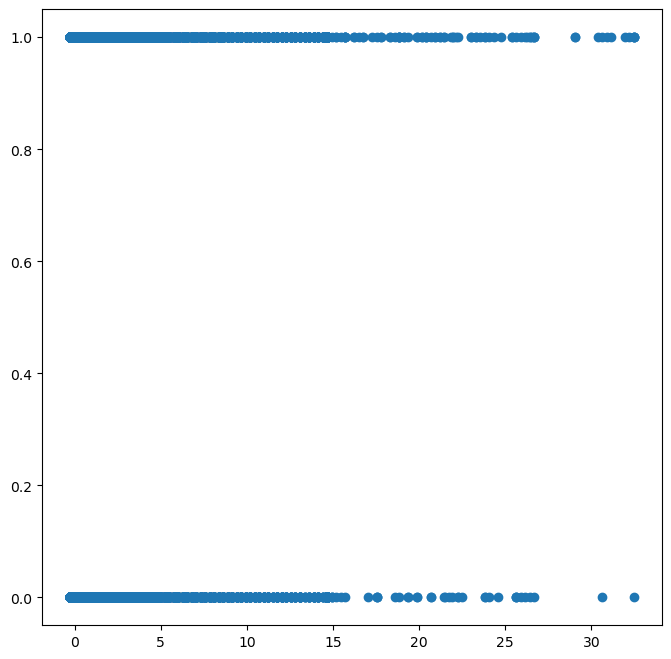

In [69]:
plt.figure(figsize=(8,8))
plt.scatter(X['claim'],Y)


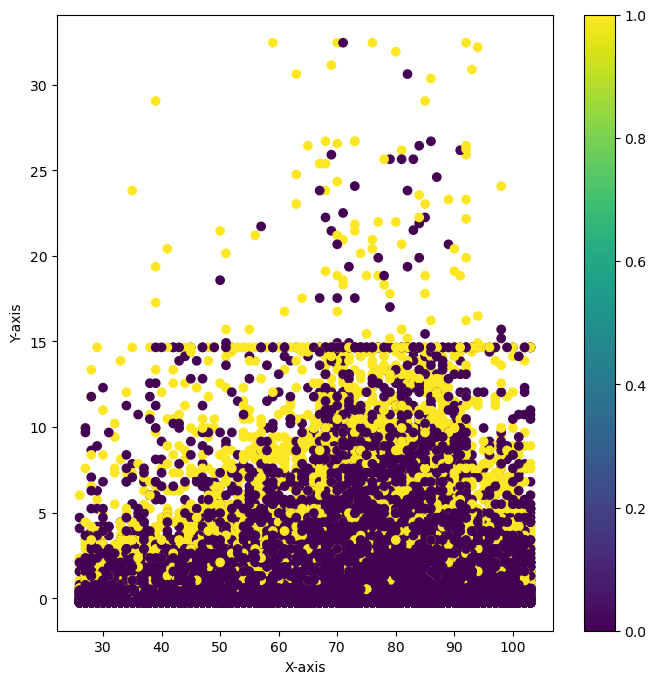

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(X['age'],X['claim'],c=Y)
    # add a colorbar to the plot
plt.colorbar()

            # set the labels for the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# show the plot
plt.show()

In [71]:
df1['PotentialFraud']= label_encoder.fit_transform(df1['PotentialFraud'])
  
df1['PotentialFraud'].unique()

array([1, 0])

In [72]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE57978,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,5859,412,99591,V1259,42731,40290,V4501,NaN,8856.0,2724.0,NaN,NaN,NaN,NaN,1068.0,42821,2009-02-11,2009-02-16,309,1942-04-01,2009-06-01,2,2,0,19,350,12,12,2,1,1,2,1,2,1,1,2,1,2,2200,2136,30,100,0
558207,BENE80245,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,25000,25060,71590,27651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29040,2009-12-15,2009-12-18,885,1943-05-01,NaN,1,1,Y,5,200,12,12,1,2,2,2,2,2,1,2,2,2,2,4000,1068,0,0,0
558208,BENE85177,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,4240,4168,27800,71481,2762,42832,V462,V1582,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,78605,2009-11-29,2009-12-07,198,1937-04-01,NaN,1,1,0,14,680,12,12,2,1,2,2,2,2,2,1,2,2,2,8000,1068,0,0,0
558209,BENE105577,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,5715,3051,29590,29410,V4579,E8490,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,27651,2009-05-28,2009-05-31,645,1927-11-01,NaN,2,1,0,3,60,12,0,1,1,2,2,2,2,1,1,2,2,2,5000,1068,0,0,0


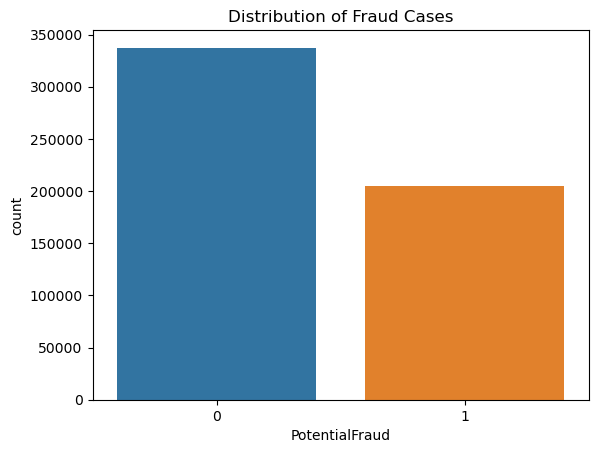

In [73]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of fraud cases
sns.countplot(x='PotentialFraud', data=df)
plt.title('Distribution of Fraud Cases')
plt.show()




In [74]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE57978,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,5859,412,99591,V1259,42731,40290,V4501,NaN,8856.0,2724.0,NaN,NaN,NaN,NaN,1068.0,42821,2009-02-11,2009-02-16,309,1942-04-01,2009-06-01,2,2,0,19,350,12,12,2,1,1,2,1,2,1,1,2,1,2,2200,2136,30,100,0
558207,BENE80245,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,25000,25060,71590,27651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29040,2009-12-15,2009-12-18,885,1943-05-01,NaN,1,1,Y,5,200,12,12,1,2,2,2,2,2,1,2,2,2,2,4000,1068,0,0,0
558208,BENE85177,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,4240,4168,27800,71481,2762,42832,V462,V1582,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,78605,2009-11-29,2009-12-07,198,1937-04-01,NaN,1,1,0,14,680,12,12,2,1,2,2,2,2,2,1,2,2,2,8000,1068,0,0,0
558209,BENE105577,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,5715,3051,29590,29410,V4579,E8490,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,27651,2009-05-28,2009-05-31,645,1927-11-01,NaN,2,1,0,3,60,12,0,1,1,2,2,2,2,1,1,2,2,2,5000,1068,0,0,0


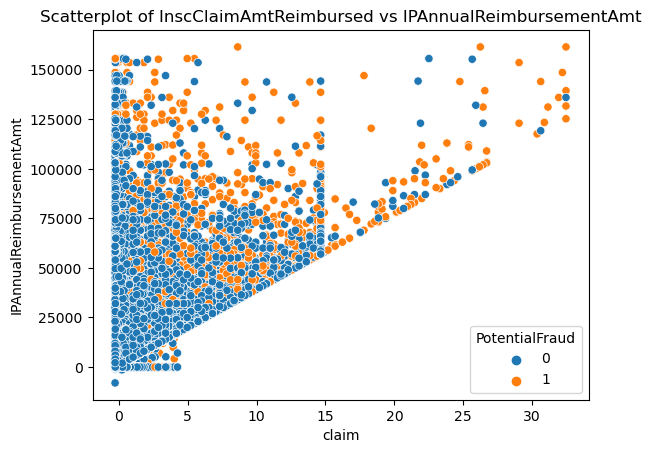

In [75]:
# Plot the correlation matrix of features


# Plot the scatterplot of two highly correlated features
sns.scatterplot(x='claim', y='IPAnnualReimbursementAmt', hue='PotentialFraud', data=df)
plt.title('Scatterplot of InscClaimAmtReimbursed vs IPAnnualReimbursementAmt')
plt.show()

In [76]:
df1=df1.drop(['ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10',
                'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
                'ClmProcedureCode_5','ClmProcedureCode_6',],axis=1)

In [77]:
# corr_matrix = df1.corr()
# sns.heatmap(corr_matrix, cmap='coolwarm')
# plt.title('Correlation Matrix of Features')
# plt.show()

<AxesSubplot:>

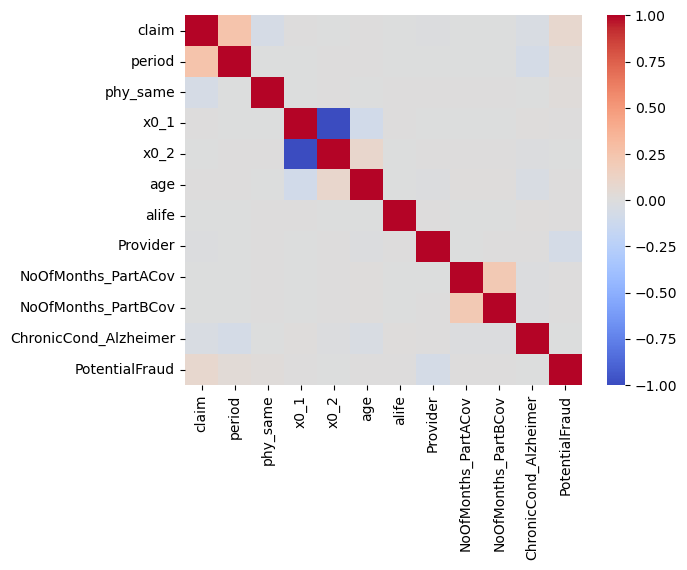

In [78]:
import pandas as pd
import seaborn as sns

cols_of_interest = ['claim',  'period', 'phy_same', 'x0_1', 'x0_2',
       'RenalDiseaseIndicator', 'age', 'alife', 'Provider',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer','PotentialFraud']

# Calculate correlation matrix
corr_matrix= df[cols_of_interest].corr()

# Create heatmap
sns.heatmap(corr_matrix,  cmap='coolwarm')

**Here the Correllation between Potential Fraud column and all other columns are around zero so, we may not be obtaining good results in regression models**

## Feature Selection and applying logistic on it 

In [79]:
X.isna().sum()


OPAnnualReimbursementAmt        0
OPAnnualDeductibleAmt           0
DeductibleAmtPaid             899
claim                           0
period                          0
phy_same                        0
x0_1                            0
x0_2                            0
RenalDiseaseIndicator           0
age                             0
alife                           0
Provider                        0
NoOfMonths_PartACov             0
NoOfMonths_PartBCov             0
ChronicCond_Alzheimer           0
ChronicCond_KidneyDisease       0
ChronicCond_Cancer              0
ChronicCond_ObstrPulmonary      0
ChronicCond_Depression          0
ChronicCond_Diabetes            0
ChronicCond_IschemicHeart       0
ChronicCond_stroke              0
IPAnnualReimbursementAmt        0
dtype: int64

In [80]:
X=X.fillna(0)

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2



scaler = MinMaxScaler()
x = scaler.fit_transform(X)
# perform univariate feature selection using chi-squared test
X_new = SelectKBest(chi2, k=4).fit_transform(x, Y)

# print the selected features
print(X_new.shape)

(542151, 4)


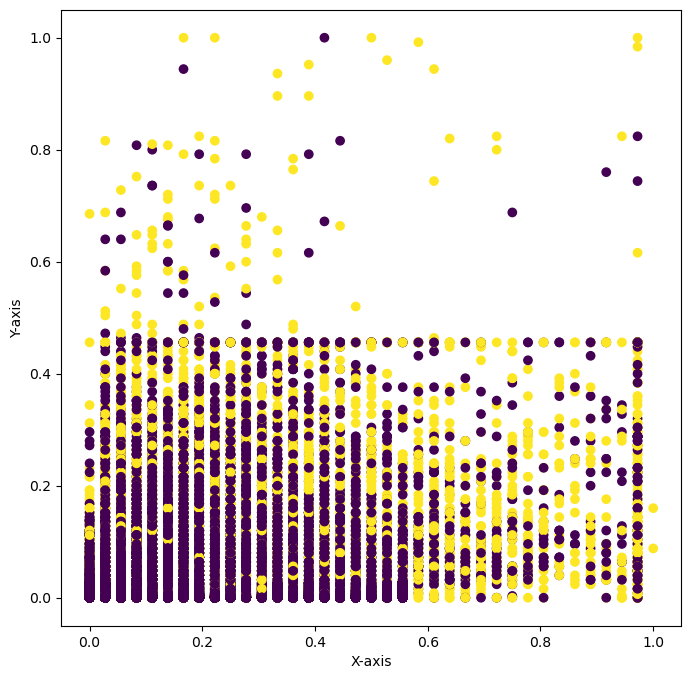

In [82]:
plt.figure(figsize=(8,8))
plt.scatter(X_new[:,2],X_new[:,1],c=Y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')


plt.show()

In [83]:
X_new

array([[0.00000000e+00, 2.40000000e-04, 0.00000000e+00, 7.40247735e-01],
       [0.00000000e+00, 3.20000000e-04, 0.00000000e+00, 7.40247735e-01],
       [0.00000000e+00, 1.60000000e-03, 0.00000000e+00, 7.40247735e-01],
       ...,
       [1.00000000e+00, 6.40000000e-02, 2.22222222e-01, 5.19504529e-01],
       [1.00000000e+00, 4.00000000e-02, 8.33333333e-02, 3.42022555e-02],
       [1.00000000e+00, 2.40000000e-02, 2.22222222e-01, 3.72712146e-01]])

In [84]:
Xtr,Xte,Ytr,Yte=train_test_split(X_new,Y, test_size=3/10, train_size=7/10) 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
classifier1 = LogisticRegression().fit(Xtr, Ytr)

In [86]:
yhat1=classifier1.predict(Xte)

In [87]:
print(f'Accuracy Score is {accuracy_score(Yte,yhat1)}')
print('Precision: %.3f' % precision_score(Yte, yhat1))
print('recall: %.3f' % recall_score(Yte, yhat1))
print('f1 score: %.3f' % f1_score(Yte, yhat1))

Accuracy Score is 0.6321151457767176
Precision: 0.576
recall: 0.110
f1 score: 0.185


In [88]:
X= X.reset_index(drop=True)

In [89]:
X

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,IPAnnualReimbursementAmt
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,0
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0
4,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542146,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,2200
542147,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2,4000
542148,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,8000
542149,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,5000


## Splitting the Data into Training set and testing set

### Applying the Logistic Regression

In [90]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y, test_size=2/10, train_size=8/10) 

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
classifier = LogisticRegression().fit(Xtrain, Ytrain)

In [92]:
yhat=classifier.predict(Xtest)

In [93]:
from sklearn.metrics import accuracy_score  
print(f'Accuracy Score is {accuracy_score(Ytest,yhat)}')  

Accuracy Score is 0.6255222215049202


In [94]:
print(f'Precision Score is {precision_score(Ytest,yhat)}') 

Precision Score is 0.5772909595803765


In [95]:
print(f'Recall Score is {accuracy_score(Ytest,yhat)}') 

Recall Score is 0.6255222215049202


In [96]:
print(f'f1 Score is {f1_score(Ytest,yhat)}') 

f1 Score is 0.08438000315692155


In [97]:
Xtest

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,IPAnnualReimbursementAmt
164359,-0.303522,-0.588510,-0.286191,0.000782,0,3,0.0,1.0,0,100,1,455,12,12,2,2,2,2,2,1,1,2,9000
133973,-0.110315,-0.388913,-0.286191,-0.250426,0,3,1.0,0.0,0,39,1,2250,12,12,2,2,2,2,1,2,1,2,0
256633,-0.478697,-0.548591,-0.286191,-0.234726,0,3,1.0,0.0,0,73,1,1405,12,12,2,2,2,2,2,2,1,2,0
20417,-0.434903,-0.568550,-0.286191,-0.260893,0,3,1.0,0.0,0,72,1,3191,12,12,2,2,2,2,2,1,1,2,0
167462,-0.009847,0.070160,-0.286191,-0.253043,0,3,0.0,1.0,0,87,1,4002,12,12,1,1,2,1,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47513,-0.329283,-0.149397,-0.286191,0.000782,0,0,0.0,1.0,0,74,1,853,12,12,2,2,2,1,1,2,2,2,0
492660,-0.566284,0.469353,3.611384,2.355859,7,3,1.0,0.0,0,64,1,390,12,12,1,1,2,1,2,1,1,2,19070
360405,0.185936,-0.269155,-0.286191,-0.182391,0,3,0.0,1.0,0,76,1,1527,12,12,2,2,2,2,2,1,2,2,0
474316,-0.571436,-0.648389,-0.286191,-0.245193,0,3,0.0,1.0,0,77,1,691,12,12,2,2,2,2,2,2,1,2,4600


### Implementing the Gradient Boosting Classifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier as GB


In [99]:
modelgb = GB()
modelgb.fit(Xtrain, Ytrain)

GradientBoostingClassifier()

In [100]:
print(modelgb)

GradientBoostingClassifier()


In [101]:
y_pred = modelgb.predict(Xtest)
predictions = [round(value) for value in y_pred]

In [102]:
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.89%


In [103]:
print('Precision: %.3f' % precision_score(Ytest,predictions))

Precision: 0.803


In [104]:
print('Recall: %.3f' % recall_score(Ytest,predictions))

Recall: 0.553


In [105]:
print('F1: %.3f' % f1_score(Ytest,predictions))

F1: 0.655


### Gradient Boosting with Hyper parameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [10, 50]
}

In [108]:
model1 = GB()


In [109]:
grid_search = GridSearchCV(estimator=model1, param_grid=params, cv=3, n_jobs=-1)


In [110]:
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50]})

**GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50]})**

In [111]:
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}
Best Score: 0.9581896150900538


**Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}
Best Score: 0.9556142283166063**

In [112]:
model1 = GB(learning_rate= 0.2 , max_depth= 7 , n_estimators= 50)

In [113]:
model1.fit(Xtrain, Ytrain)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50)

In [114]:
y_pred = model1.predict(Xtest)

predictions1 = [round(value) for value in y_pred]

In [115]:
accuracy = accuracy_score(Ytest, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.94%


In [116]:
print('Precision: %.3f' % precision_score(Ytest,predictions1))

Precision: 0.963


In [117]:
print('Recall: %.3f' % recall_score(Ytest,predictions1))

Recall: 0.901


In [118]:
print('F1: %.3f' % f1_score(Ytest,predictions1))

F1: 0.931


In [119]:
Ytest.shape[0]

108431

In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, predictions1))


[[65921  1404]
 [ 4082 37024]]


## Implementing Random Forest 


In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [123]:
y_pred = rf.predict(Xtest)

In [124]:
accuracy = accuracy_score(Ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8042626186238253


In [125]:
print(f'Precision Score is {precision_score(Ytest,y_pred)}') 

Precision Score is 0.7953357100415924


In [126]:
print(f'Recall Score is {recall_score(Ytest,y_pred)}') 

Recall Score is 0.6512674548727679


In [127]:
print(f'F1 Score is {f1_score(Ytest,y_pred)}') 

F1 Score is 0.716127651606345


## Importing the tensor flow Model for Neural Networks applications

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


In [129]:
Xtrain = tf.constant(np.asarray(Xtrain), dtype=tf.float32)
Ytrain = tf.constant(np.asarray(Ytrain), dtype=tf.float32)


In [130]:
model = Sequential(
    [               
        tf.keras.Input(shape=(23,)),    #specify input size
        
        Dense(units=23,activation='relu'),
        
        Dense(units=1,activation='sigmoid')
        
        
        
    ], name = "my_model" 
)


In [131]:
model.summary()


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                552       
                                                                 
 dense_1 (Dense)             (None, 1)                 24        
                                                                 
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    
)


In [133]:
Xtrain 

<tf.Tensor: shape=(433720, 23), dtype=float32, numpy=
array([[ 5.3628516e-01,  9.8830497e-01, -2.8619105e-01, ...,
         1.0000000e+00,  2.0000000e+00,  0.0000000e+00],
       [-4.4778353e-01, -6.0846967e-01,  3.6113834e+00, ...,
         1.0000000e+00,  2.0000000e+00,  4.0500000e+03],
       [-4.3232697e-01, -8.9517929e-02, -2.8619105e-01, ...,
         2.0000000e+00,  2.0000000e+00,  0.0000000e+00],
       ...,
       [-3.8853332e-01,  1.3003859e-01, -2.8619105e-01, ...,
         1.0000000e+00,  2.0000000e+00,  0.0000000e+00],
       [ 2.8382772e-01,  2.6975638e-01, -2.8619105e-01, ...,
         1.0000000e+00,  2.0000000e+00,  9.0000000e+03],
       [ 1.5502293e-01,  5.3921211e-01, -2.8619105e-01, ...,
         1.0000000e+00,  2.0000000e+00,  3.3000000e+04]], dtype=float32)>

In [134]:
model.fit(Xtrain,Ytrain,epochs=15)

Epoch 1/15
13554/13554 [==============================] - 38s 3ms/step - loss: 7.3797
Epoch 2/15
13554/13554 [==============================] - 35s 3ms/step - loss: 5.5393
Epoch 3/15
13554/13554 [==============================] - 35s 3ms/step - loss: 4.7469
Epoch 4/15
13554/13554 [==============================] - 35s 3ms/step - loss: 3.9799
Epoch 5/15
13554/13554 [==============================] - 35s 3ms/step - loss: 3.0570
Epoch 6/15
13554/13554 [==============================] - 35s 3ms/step - loss: 2.3207
Epoch 7/15
13554/13554 [==============================] - 35s 3ms/step - loss: 1.8901
Epoch 8/15
13554/13554 [==============================] - 34s 3ms/step - loss: 1.5146
Epoch 9/15
13554/13554 [==============================] - 35s 3ms/step - loss: 0.9189
Epoch 10/15
13554/13554 [==============================] - 35s 3ms/step - loss: 0.6536
Epoch 11/15
13554/13554 [==============================] - 35s 3ms/step - loss: 0.6533
Epoch 12/15
13554/13554 [===========================

In [135]:
Xtest = tf.constant(np.asarray(Xtest), dtype=tf.float32)
Ytest = tf.constant(np.asarray(Ytest), dtype=tf.float32)

In [136]:
prediction = model.predict(Xtest)

3389/3389 [==============================] - 5s 1ms/step


In [137]:
prediction


array([[0.39695898],
       [0.39386997],
       [0.386472  ],
       ...,
       [0.38540924],
       [0.3946201 ],
       [0.4055721 ]], dtype=float32)

In [138]:
yhut=[]
for i in range(len(prediction)):
    if prediction[i] >= 0.3:
      
        yhut.append(1)
    else:                                #if threshold is high then there will be less False Positive - Prediction a good one as fraud will be more
                                        # if the threshold is low then there will be False Negative -- Prediction a good one as fraud will be less
        yhut.append(0)


In [139]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f'Accuracy Score is {accuracy_score(Ytest,yhut)}') 
print('Precision: %.3f' % precision_score(Ytest, yhut))
print('recall: %.3f' % recall_score(Ytest, yhut))
print('f1 score: %.3f' % f1_score(Ytest, yhut))


Accuracy Score is 0.39527441414355674
Precision: 0.384
recall: 0.987
f1 score: 0.553


In [140]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, yhut))

[[ 2300 65025]
 [  546 40560]]


In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [142]:
clf = DecisionTreeClassifier(max_depth=6)

In [143]:
clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=6)

In [144]:
y_pred1 = clf.predict(Xtest)

In [145]:
del df1

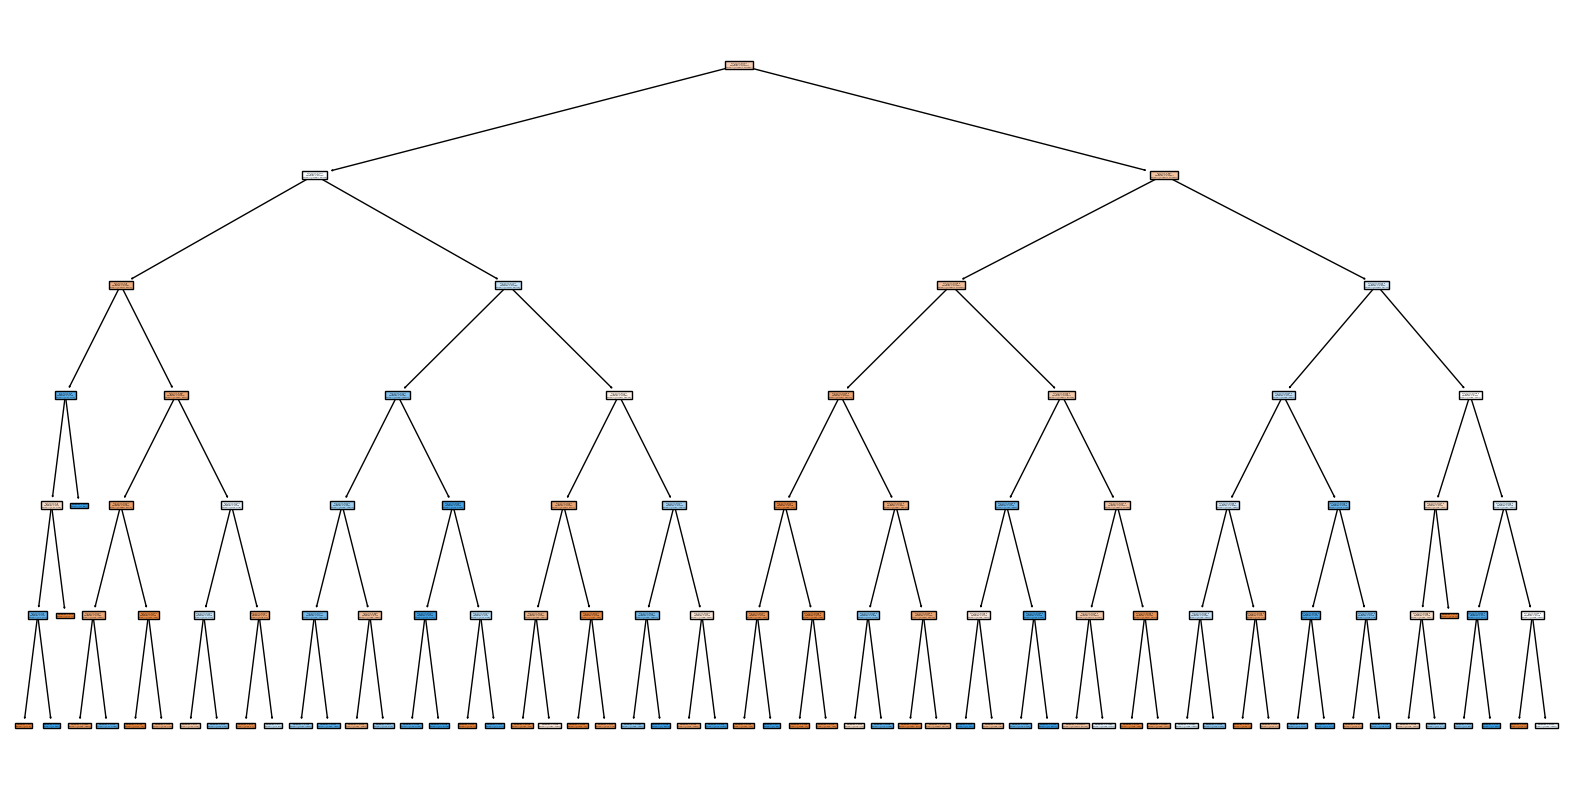

In [146]:

from sklearn.tree import plot_tree
# Print the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.savefig('decision_tree1.png')
plt.show()

In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f'Accuracy Score is {accuracy_score(Ytest,y_pred1)}') 
print('Precision: %.3f' % precision_score(Ytest, y_pred1))
print('recall: %.3f' % recall_score(Ytest, y_pred1))
print('f1 score: %.3f' % f1_score(Ytest, y_pred1))

Accuracy Score is 0.7166400752552314
Precision: 0.724
recall: 0.408
f1 score: 0.522


In [148]:
y_pred2 = clf.predict(Xtrain)
print(f'Accuracy Score is {accuracy_score(Ytrain,y_pred2)}') 
print('Precision: %.3f' % precision_score(Ytrain, y_pred2))
print('recall: %.3f' % recall_score(Ytrain, y_pred2))
print('f1 score: %.3f' % f1_score(Ytrain, y_pred2))

Accuracy Score is 0.7179032555565803
Precision: 0.724
recall: 0.409
f1 score: 0.522


### Combining all results

In [149]:
models = [classifier,model,clf,modelgb,model1,rf]

accuracy = []
precision = []
recall = []
f1 = []
yhut=[]
# loop through each model
for modeli in models:
    
    
    # make predictions on the test data
    y_pred = modeli.predict(Xtest)
    if(modeli==model):
        
        for i in range(len(y_pred)):
            if y_pred[i] >= 0.5:

                yhut.append(1)
            else:                                #if threshold is high then there will be less False Positive - Prediction a good one as fraud will be more
                                            # if the threshold is low then there will be False Negative -- Prediction a good one as fraud will be less
                yhut.append(0)
        y_pred=yhut
    # calculate the metric scores and append them to the corresponding list
    accuracy.append(accuracy_score(Ytest, y_pred))
    precision.append(precision_score(Ytest, y_pred))
    recall.append(recall_score(Ytest, y_pred))
    f1.append(f1_score(Ytest, y_pred))
    print(modeli)

metric_scores = {'Model': ['Logistic Regression','Neural Networks','Decision Tree','Gradient Boosting','GB with Hp Tuning', 'Random Forest'],
                 'Accuracy': accuracy,
                 'Precision': precision,
                 'Recall': recall,
                 'F1-Score': f1
                }

# create a Pandas DataFrame from the dictionary
data = pd.DataFrame(metric_scores)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


LogisticRegression()
3389/3389 [==============================] - 5s 1ms/step
DecisionTreeClassifier(max_depth=6)


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


GradientBoostingClassifier()


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50)


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier()


In [150]:
data

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.625522,0.577291,0.045516,0.084380
1,Neural Networks,0.634440,0.692955,0.064127,0.117390
2,Decision Tree,0.716640,0.724318,0.407726,0.521753
3,Gradient Boosting,0.778864,0.802636,0.552547,0.654516
4,GB with Hp Tuning,0.949406,0.963464,0.900696,0.931023
5,Random Forest,0.804263,0.795336,0.651267,0.716128


In [151]:
import plotly.graph_objects as go
import pandas as pd


In [152]:
df=data

In [153]:
df = df.set_index('Model')

In [154]:
# Create a line plot for each model
fig = go.Figure()
for model in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[model], name=model))

# Add labels and legend to the plot
fig.update_layout(title='Model Performance by Score',
                  xaxis_title='Score',
                  yaxis_title='Value',
                  legend_title='Model')

# Show the plot
fig.show()

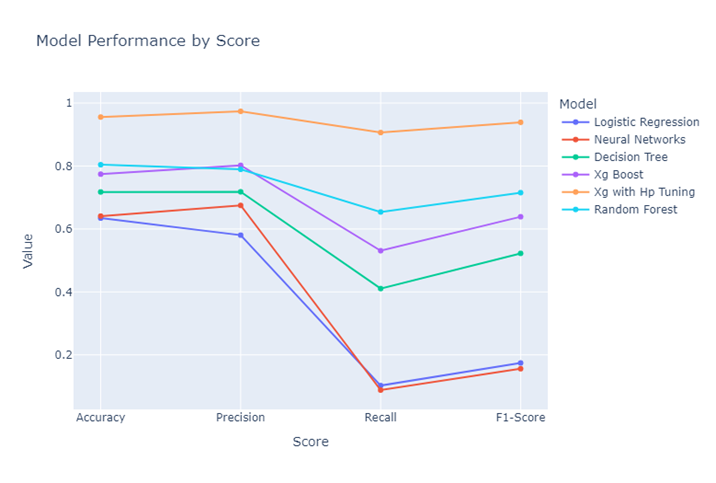

### Working on Under Sampled Data 

In [155]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(X,Y, test_size=3/10, train_size=7/10)
X1,Y1 = undersample.fit_resample(Xtrain1, Ytrain1)


**Applying Gradient Boosting**

In [156]:
model2 = GB( learning_rate=0.1, max_depth=4,n_estimators=5)
model2.fit(Xtrain1, Ytrain1)
y_pred = model2.predict(Xtest1)
predictions2 = [round(value) for value in y_pred]

In [157]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy = accuracy_score(Ytest1, predictions2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision: %.3f' % precision_score(Ytest1,predictions2))
print('F1: %.3f' % f1_score(Ytest1,predictions2))

Accuracy: 68.23%
Precision: 0.891
F1: 0.302


**Applying Logistic Regression**

In [158]:
classifier = LogisticRegression().fit(Xtrain1, Ytrain1)
yhat=classifier.predict(Xtest1)

In [159]:

print(f'Accuracy Score is {accuracy_score(Ytest1,yhat)}') 
print(f'Precision Score is {precision_score(Ytest1,yhat)}') 


Accuracy Score is 0.622234792125229
Precision Score is 0.5109199205823958


Inference : The undersampling didn't helped us much, our accuracy reduced slightly compared to before 
- we can tell that undersampling may not work sometime , as it undersamples the data we may tend to loose important information

### Working with Over Sampling

In [160]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(X,Y, test_size=3/10, train_size=7/10)
X2,Y2 = oversample.fit_resample(Xtrain1, Ytrain1)


In [161]:
model3 = GB( learning_rate=0.1, max_depth=4,n_estimators=5)
model3.fit(Xtrain1, Ytrain1)
y_pred = model3.predict(Xtest1)
predictions3 = [round(value) for value in y_pred]


In [162]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy = accuracy_score(Ytest1, predictions3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision: %.3f' % precision_score(Ytest1,predictions3))
print('F1: %.3f' % f1_score(Ytest1,predictions3))

Accuracy: 67.05%
Precision: 0.881
F1: 0.251


# Working on fraud based on Provider

In [163]:
pro

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,IPAnnualReimbursementAmt,PotentialFraud
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,0,1
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0,1
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0,1
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0,1
6,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,2200,0
558207,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2,4000,0
558208,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,8000,0
558209,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,5000,0


In [164]:
pro["Provider"].unique().shape[0]

5410

In [165]:
pro["Provider1"]=1

In [166]:
numeric_cols = pro.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt',
 'DeductibleAmtPaid',
 'claim',
 'period',
 'phy_same',
 'x0_1',
 'x0_2',
 'age',
 'alife',
 'Provider',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'PotentialFraud',
 'Provider1']

In [167]:
numeric_cols = pro.select_dtypes(include=np.number).columns.tolist()
main_df=pro[numeric_cols].groupby('Provider')[['OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt',
 'DeductibleAmtPaid',
 'claim',
 'period',
 'phy_same',
 'x0_1',
 'x0_2',
 'age',
 'alife',
 'Provider',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'Provider1',
 'PotentialFraud']].agg(['sum'])

In [168]:
main_df

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,IPAnnualReimbursementAmt,Provider1,PotentialFraud
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Provider,,,,,,,,,,,,,,,,,,,,,,,,
0,2.170198,-4.635106,12.333097,20.859359,36,74,9.0,16.0,2006,25,0,300,300,35,33,45,40,41,29,27,44,440150,25,0
1,13.702893,12.085054,200.516481,123.265087,483,319,53.0,78.0,9339,130,131,1548,1555,207,199,252,221,209,163,151,250,990980,131,131
2,-3.487352,-3.837662,-41.224955,-24.971087,213,417,46.0,102.0,10880,147,296,1756,1770,233,246,280,256,233,192,188,279,648430,148,0
3,-49.098974,-25.029580,-297.014442,-211.642419,1268,2942,470.0,615.0,77977,1081,3255,12912,12950,1776,1706,2014,1907,1727,1432,1351,2065,3989820,1085,1085
4,-10.173576,-12.932188,-8.694066,-9.963250,69,197,34.0,38.0,5082,71,288,852,852,118,122,132,128,115,95,93,132,219600,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,6.950227,6.625053,-7.538925,-4.520790,60,81,16.0,12.0,2108,28,151340,336,336,42,41,52,45,47,36,28,52,110940,28,0
5406,-4.451741,3.419720,-6.296203,-4.491463,7,51,17.0,5.0,1371,22,118932,264,258,41,42,44,42,37,26,22,44,61280,22,0


In [169]:
main_df.isna().sum()

OPAnnualReimbursementAmt    sum    0
OPAnnualDeductibleAmt       sum    0
DeductibleAmtPaid           sum    0
claim                       sum    0
period                      sum    0
phy_same                    sum    0
x0_1                        sum    0
x0_2                        sum    0
age                         sum    0
alife                       sum    0
Provider                    sum    0
NoOfMonths_PartACov         sum    0
NoOfMonths_PartBCov         sum    0
ChronicCond_Alzheimer       sum    0
ChronicCond_KidneyDisease   sum    0
ChronicCond_Cancer          sum    0
ChronicCond_ObstrPulmonary  sum    0
ChronicCond_Depression      sum    0
ChronicCond_Diabetes        sum    0
ChronicCond_IschemicHeart   sum    0
ChronicCond_stroke          sum    0
IPAnnualReimbursementAmt    sum    0
Provider1                   sum    0
PotentialFraud              sum    0
dtype: int64

In [170]:
main_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [171]:

main_df.fillna(main_df.mean(), inplace=True)

In [172]:
main_df.isna().sum()

OPAnnualReimbursementAmt    sum    0
OPAnnualDeductibleAmt       sum    0
DeductibleAmtPaid           sum    0
claim                       sum    0
period                      sum    0
phy_same                    sum    0
x0_1                        sum    0
x0_2                        sum    0
age                         sum    0
alife                       sum    0
Provider                    sum    0
NoOfMonths_PartACov         sum    0
NoOfMonths_PartBCov         sum    0
ChronicCond_Alzheimer       sum    0
ChronicCond_KidneyDisease   sum    0
ChronicCond_Cancer          sum    0
ChronicCond_ObstrPulmonary  sum    0
ChronicCond_Depression      sum    0
ChronicCond_Diabetes        sum    0
ChronicCond_IschemicHeart   sum    0
ChronicCond_stroke          sum    0
IPAnnualReimbursementAmt    sum    0
Provider1                   sum    0
PotentialFraud              sum    0
dtype: int64

In [173]:
Y=main_df.iloc[::,-1]

X=main_df.iloc[:,:-1]

In [174]:
for i in range(Y.shape[0]):
    if(Y[i] > 0):
        Y[i]=Y[i]/Y[i]
Y

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Provider
0       0
1       1
2       0
3       1
4       0
       ..
5405    0
5406    0
5407    0
5408    0
5409    0
Name: (PotentialFraud, sum), Length: 5410, dtype: int64

In [175]:
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(X,Y, test_size=3/10, train_size=7/10)

In [176]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest Classifier
rf.fit(Xtrain1, Ytrain1)

# Make predictions on testing data
y_pred = rf.predict(Xtest1)



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



In [177]:
# Evaluate performance of Random Forest Classifier
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy:', accuracy_score(Ytest1, y_pred))
print('Confusion Matrix:', confusion_matrix(Ytest1, y_pred))

Accuracy: 0.933456561922366
Confusion Matrix: [[1445   35]
 [  73   70]]


In [178]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your dataset and split into training and testing sets

# Instantiate the Gradient Boosting classifier with desired hyperparameters
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0)

# Fit the model to the training data
gb.fit(Xtrain1, Ytrain1)

# Make predictions on the testing data
y_pred = gb.predict(Xtest1)

# Calculate accuracy score
accuracy = accuracy_score(Ytest1, y_pred)
print('Accuracy: ', accuracy)

# Calculate confusion matrix
cm = confusion_matrix(Ytest1, y_pred)
print('Confusion Matrix: ', cm)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



Accuracy:  0.9340727048675292
Confusion Matrix:  [[1443   37]
 [  70   73]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



In [179]:
classifier = LogisticRegression().fit(Xtrain1, Ytrain1)
yhat2=classifier.predict(Xtest1)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



In [180]:
print(f'Accuracy Score is {accuracy_score(Ytest1,yhat2)}') 
print(f'Precision Score is {precision_score(Ytest1,yhat2)}') 

Accuracy Score is 0.6888478126925447
Precision Score is 0.15977443609022557
